In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]).reshape(6, 3)
B = np.array([np.arange(1, 25).reshape(6, 4)[i][::-1] if i%2 == 1 else np.arange(1, 25).reshape(6, 4)[i] for i in range(6)])
C = np.random.randint(2, 11, size = (4, 3))
D = np.eye(4, 4, dtype = int)

S = np.block([[A, B], [C, D]])

F = np.zeros((10, 2), dtype = int)

G = np.block([S, F])

print(G)

[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 4  9  4  1  0  0  0  0  0]
 [ 9  3  9  0  1  0  0  0  0]
 [ 2  4  4  0  0  1  0  0  0]
 [ 2  6  3  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
def find_nearest_neighbour(X, a):
    close_id = np.abs(X - a).argmin()
    return X.take(close_id)

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
# Придумайте свои данные для примера, N >= 4
A = np.random.rand(5, 5)
b = np.random.rand(5)
X = np.random.rand(5)

def very_strange_neural_network(A, b, X):
    return X@(A@A)@b


print(very_strange_neural_network(A, b, X))

15.251968549646747


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
    return np.sum(np.ones(M.shape)[M < -5])

def find_water_volume(M):
    return abs(np.sum(M[M < 0]))

def find_max_height(M):
    max_height = int(M.take(M.argmax()))
    return max_height

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1.0 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
    return np.sum(np.diff(a) == 1)

In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
    return np.where(M>a, int(np.mean(X)), M)

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))


In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    size = len(a)
    A = np.concatenate((a, a[::-1]))
    B = np.zeros((len(A), len(A)), dtype = int)
    for i in range(size):
        B[i] = A
        A = A + 1

    return B + np.flipud(B)


In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
    N = np.shape(P)[0]
    M = np.shape(P)[1]
    n = N - C + 1
    m = M - C + 1
    S = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            S[i][j] = np.mean(P[i:i+C, j:j+C])

    return S

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def check_successful_broadcast(*matrices):
    try:
        np.broadcast(*[np.empty(shape) for shape in matrices])
        return True
    except ValueError:
        return False

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, np.newaxis, :] - B[np.newaxis, :, :]) ** 2).sum(axis=2))

In [ ]:
A = np.array([
    [1, 3, 5, 6],
    [2, 7, 8, 4],
    [0, 1, 4, 9]
])
B = np.array([
    [1, 2, 3, 4],
    [2, 3, 4, 5],
    [5, 4, 3, 2],
    [1, 2, 2, 2],
    [6, 6, 6, 3]
])

pairwise_distances(A, B)

array([[ 3.        ,  1.73205081,  6.08276253,  5.09901951,  6.63324958],
       [ 7.14142843,  5.74456265,  6.8556546 ,  8.1240384 ,  4.69041576],
       [ 5.29150262,  4.89897949,  9.16515139,  7.41619849, 10.04987562]])

<h1>Объяснение работы строки кода</h1>
<ol>
  <li>
    В коде <code>A[:, np.newaxis, :]</code> добавляется новая ось к массиву <code>A</code>, что изменяет его форму на <code>(n, 1, k)</code>.
  </li>
  <li>
    Для массива <code>B</code> операция <code>B[np.newaxis, :, :]</code> также добавляет новую ось, изменяя его форму до <code>(1, m, k)</code>.
  </li>
  <li>
    Используя механизм <b>broadcasting</b>, массивы <code>A[:, np.newaxis, :]</code> и <code>B[np.newaxis, :, :]</code> становятся совместимыми для вычитания. Результатом является массив размера <code>(n, m, k)</code>, где производится поэлементное вычитание по третьей оси.
  </li>
  <li>
    Выражение <code>np.sqrt(((A[:, np.newaxis, :] - B[np.newaxis, :, :]) ** 2).sum(axis=2))</code> находит евклидово расстояние. Сначала разности элементов возводятся в квадрат, затем по оси <code>k</code> вычисляется их сумма, после чего извлекается квадратный корень из полученного значения.
  </li>
</ol>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [ ]:
data = pd.read_csv("data_numpy_lab.csv")
data.head(10)

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17
5,6,3,235,1,216.0,108.0,0.17
6,7,3,226,1,216.0,108.0,0.15
7,8,3,234,1,216.0,108.0,0.16
8,9,3,229,1,216.0,108.0,0.16
9,10,3,230,1,216.0,108.0,0.18


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [ ]:
del data["Unnamed: 0"]

In [ ]:
data = data.rename(
    columns= {
        "mass, gramm": "mass",
        "length, cm": "length",
        "t, sec": "t",
        "sigma_t, sec": "sigma_t",
        "phi, rad": "phi",
        }
    )

data.index = range(1, len(data) + 1)
data["mass"] = data["mass"] / 1000
mass = data["mass"]
data["length"] = data["length"] / 100
length = data["length"]
t = data["t"]
N = data["N"]
sigma_t = data["sigma_t"]
phi = data["phi"]

data.head(10)

,N,t,sigma_t,mass,length,phi
1,4,268,1,0.180,1.21,0.16
2,4,264,1,0.180,1.21,0.18
3,4,275,1,0.180,1.21,0.16
4,4,263,1,0.180,1.21,0.17
5,4,267,1,0.180,1.21,0.17
6,3,235,1,0.216,1.08,0.17
7,3,226,1,0.216,1.08,0.15
8,3,234,1,0.216,1.08,0.16
9,3,229,1,0.216,1.08,0.16
10,3,230,1,0.216,1.08,0.18


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
# YOUR CODE HERE
data["omega"] = 2 * np.pi * (N / t)
omega = data["omega"]
data["sigma_omega"] = (omega / t) * sigma_t
sigma_omega = data["sigma_omega"]
data["omega_down"] = phi / t
omega_down = data["omega_down"]
data["sigma_down"] = omega_down * (sigma_t / t)
sigma_down = data["sigma_down"]
g = 9.8
data["momentum"] = mass * g * length
momentum = data["momentum"]
data["momentum_down"] = mass * (phi / (t ** 2)) * (length ** 2)
momentum_down = data["momentum_down"]
data["sigma_momentum"] = momentum_down * (sigma_t / t)
sigma_momentum = data["sigma_momentum"]

assert np.allclose(data.momentum_down[1], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 2.2e-09, atol=5e-10)

data.head(10)

,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
1,4,268,1,0.180,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.134440,5.870751e-07,2.190579e-09
2,4,264,1,0.180,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.134440,6.806250e-07,2.578125e-09
3,4,275,1,0.180,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.134440,5.575680e-07,2.027520e-09
4,4,263,1,0.180,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.134440,6.477101e-07,2.462776e-09
5,4,267,1,0.180,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.134440,6.284484e-07,2.353739e-09
6,3,235,1,0.216,1.08,0.17,0.080211,0.000341,0.000723,0.000003,2.286144,7.755583e-07,3.300248e-09
7,3,226,1,0.216,1.08,0.15,0.083405,0.000369,0.000664,0.000003,2.286144,7.399045e-07,3.273914e-09
8,3,234,1,0.216,1.08,0.16,0.080554,0.000344,0.000684,0.000003,2.286144,7.361893e-07,3.146108e-09
9,3,229,1,0.216,1.08,0.16,0.082312,0.000359,0.000699,0.000003,2.286144,7.686883e-07,3.356718e-09
10,3,230,1,0.216,1.08,0.18,0.081955,0.000356,0.000783,0.000003,2.286144,8.572709e-07,3.727265e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [ ]:
grouped_data = data.groupby("mass")[["omega", "sigma_omega", "momentum", "momentum_down", "sigma_momentum", "sigma_down", "omega_down", "momentum_down"]].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down,sigma_momentum,sigma_down,omega_down,momentum_down
mass,,,,,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07,1.453459e-09,0.000002,0.000559,4.108862e-07
0.180,0.094012,0.000352,2.134440,6.202853e-07,2.322548e-09,0.000002,0.000629,6.202853e-07
0.216,0.081687,0.000354,2.286144,7.755223e-07,3.360850e-09,0.000003,0.000710,7.755223e-07
0.273,0.143300,0.000817,3.263988,2.166527e-06,1.235485e-08,0.000005,0.000935,2.166527e-06
0.341,0.150752,0.000723,3.675980,1.577406e-06,7.570192e-09,0.000004,0.000797,1.577406e-06
0.614,0.185194,0.000910,6.679092,3.030996e-06,1.489473e-08,0.000004,0.000815,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

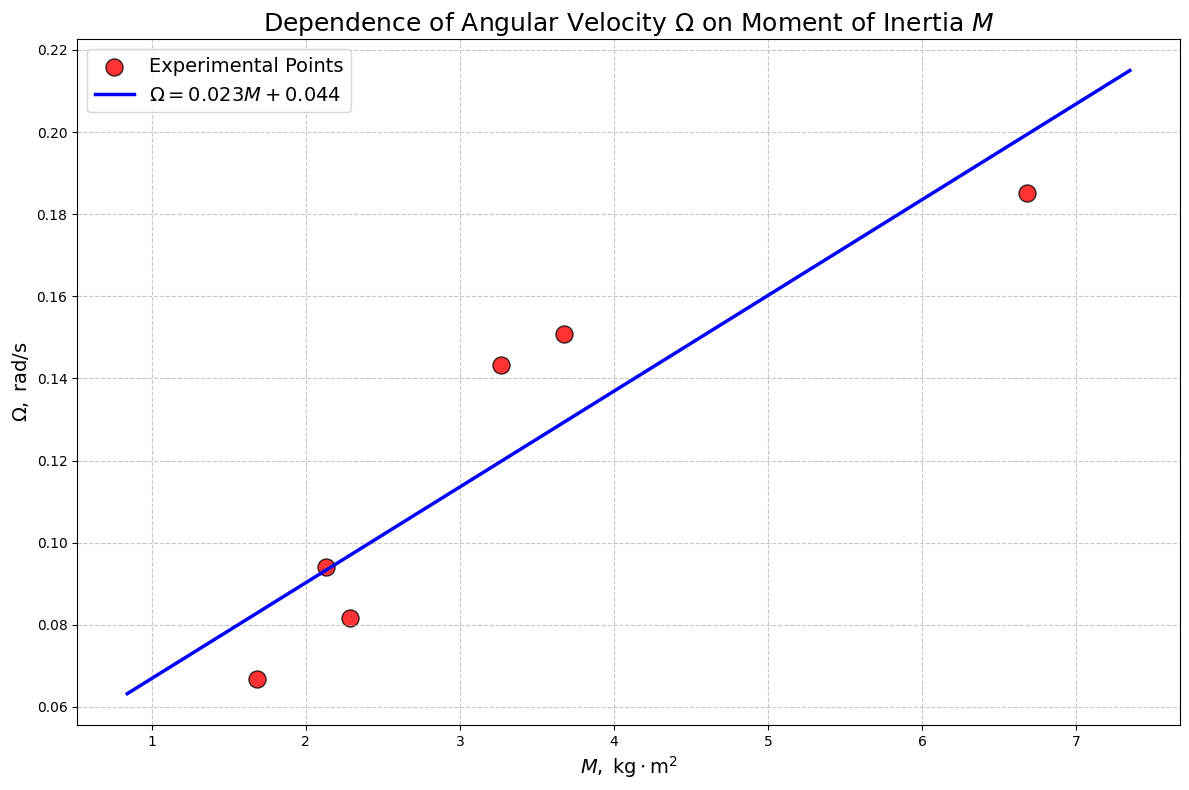

In [ ]:

coefs = np.polyfit(momentum_np, omega_np, deg=1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(
    momentum_np,
    omega_np,
    s=150,
    c="red",
    marker="o",
    alpha=0.8,
    edgecolors="black",
    label="Experimental Points"
)

ax.plot(
    x_lsq,
    y_lsq,
    color="blue",
    lw=2.5,
    label=f"$\\Omega = {coefs[0]:.3f}M + {coefs[1]:.3f}$"
)

ax.set_title("Dependence of Angular Velocity $\\Omega$ on Moment of Inertia $M$", fontsize=18)
ax.set_xlabel("$M, \\; \\mathrm{kg \\cdot m^2}$", fontsize=14)
ax.set_ylabel("$\\Omega, \\; \\mathrm{rad/s}$", fontsize=14)
ax.grid(which='both', linestyle='--', alpha=0.7)

ax.legend(fontsize=14, loc="upper left")

plt.tight_layout()
plt.show()


`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [ ]:
grouped_data["sigma_down"] = grouped_data["sigma_down"] * 10
grouped_data["sigma_momentum"] = grouped_data["sigma_momentum"] * 10

grouped_data

,omega,sigma_omega,momentum,momentum_down,sigma_momentum,sigma_down,omega_down,momentum_down
mass,,,,,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07,1.453459e-08,0.000020,0.000559,4.108862e-07
0.180,0.094012,0.000352,2.134440,6.202853e-07,2.322548e-08,0.000024,0.000629,6.202853e-07
0.216,0.081687,0.000354,2.286144,7.755223e-07,3.360850e-08,0.000031,0.000710,7.755223e-07
0.273,0.143300,0.000817,3.263988,2.166527e-06,1.235485e-07,0.000053,0.000935,2.166527e-06
0.341,0.150752,0.000723,3.675980,1.577406e-06,7.570192e-08,0.000038,0.000797,1.577406e-06
0.614,0.185194,0.000910,6.679092,3.030996e-06,1.489473e-07,0.000040,0.000815,3.030996e-06




Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

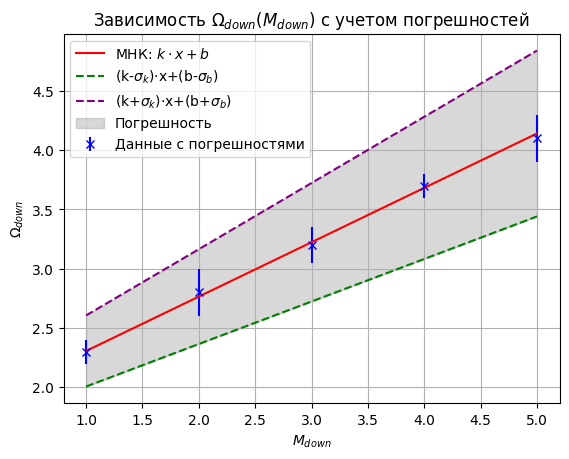

In [ ]:
# Пример данных для графика (замените их на свои значения)
M_down = np.array([1, 2, 3, 4, 5])  # Пример значений M_down
Omega_down = np.array([2.3, 2.8, 3.2, 3.7, 4.1])  # Пример значений Omega_down
errors = np.array([0.1, 0.2, 0.15, 0.1, 0.2])  # Погрешности

# Линейная регрессия (МНК)
coeffs = np.polyfit(M_down, Omega_down, 1, w=1/errors)
k, b = coeffs
Omega_fit = k * M_down + b

# Учет погрешностей коэффициентов
sigma_k = 0.1  # Пример ошибки k
sigma_b = 0.2  # Пример ошибки b

Omega_fit_min = (k - sigma_k) * M_down + (b - sigma_b)
Omega_fit_max = (k + sigma_k) * M_down + (b + sigma_b)

# Построение графика
plt.errorbar(M_down, Omega_down, yerr=errors, fmt='x', label="Данные с погрешностями", color="blue")
plt.plot(M_down, Omega_fit, label="МНК: $k \cdot x + b$", color="red")
plt.plot(M_down, Omega_fit_min, '--', label="(k-$\sigma_k$)$\cdot$x+(b-$\sigma_b$)", color="green")
plt.plot(M_down, Omega_fit_max, '--', label="(k+$\sigma_k$)$\cdot$x+(b+$\sigma_b$)", color="purple")
plt.fill_between(M_down, Omega_fit_min, Omega_fit_max, color='gray', alpha=0.3, label="Погрешность")

# Оформление
plt.xlabel("$M_{down}$")
plt.ylabel("$\Omega_{down}$")
plt.title("Зависимость $\Omega_{down}(M_{down})$ с учетом погрешностей")
plt.legend()
plt.grid()
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")
#sns.get_dataset_names()

In [ ]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

iris.index = range(1, len(iris) + 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
count_species = iris["species"].value_counts()
count_species

,count
species,
setosa,50
versicolor,50
virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

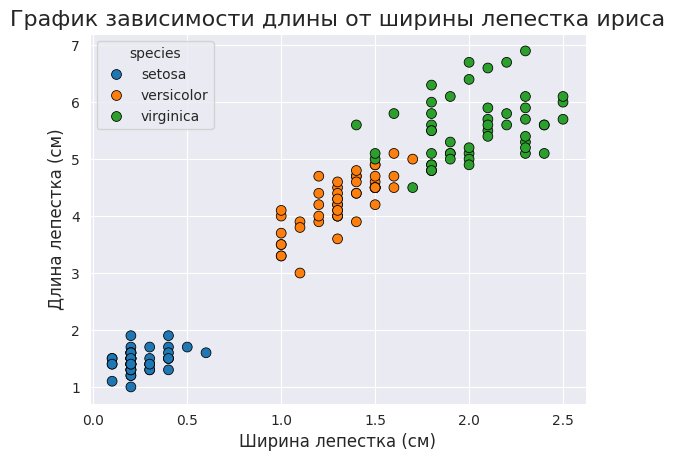

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

sns.scatterplot(
    data=iris,
    x="petal_width",
    y="petal_length",
    hue="species",
    style=None,
    s=50,
    edgecolor='black'
)

plt.title("График зависимости длины от ширины лепестка ириса", fontsize=16)
plt.xlabel("Ширина лепестка (см)", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=12)
plt.show()


Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<p>Из графика видно, что с увеличением ширины растет и длина лепестков ириса. Можно сделать вывод, что точки расположены вдоль прямой. Однако было бы полезно знать, к какому виду относится каждая точка. Мы добавили цветовое разделение, что устранило эту проблему.</p>


Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

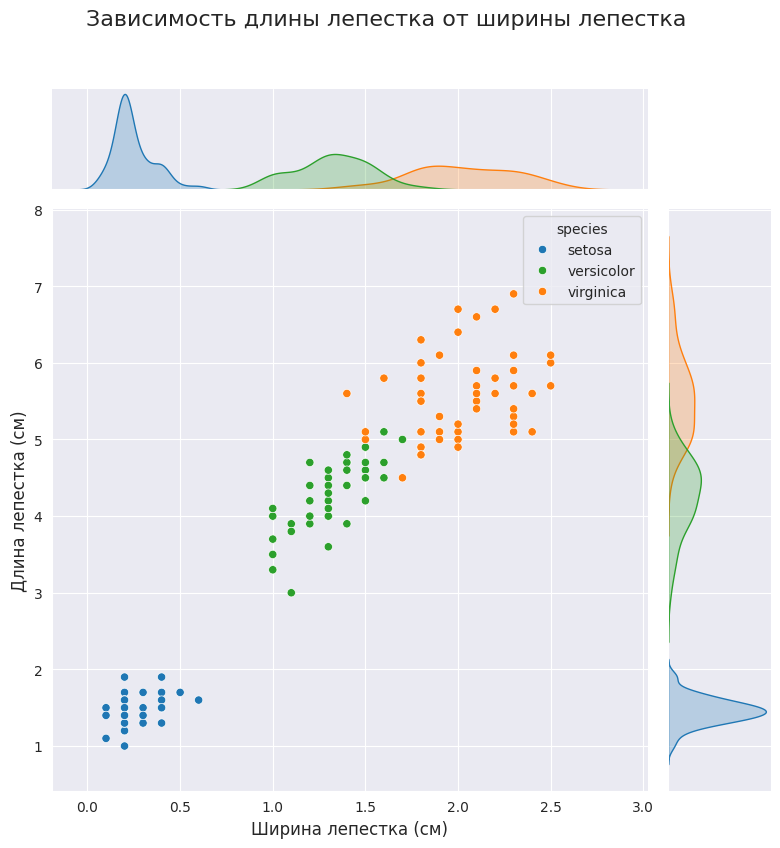

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

palette = ["#1f77b4", "#2ca02c", "#ff7f0e"]

g = sns.jointplot(
    data=iris,
    x="petal_width",
    y="petal_length",
    hue="species",
    palette=palette,
    kind="scatter",
    height=8,
)

g.fig.suptitle("Зависимость длины лепестка от ширины лепестка", fontsize=16, y=1.05)
g.set_axis_labels("Ширина лепестка (см)", "Длина лепестка (см)", fontsize=12)
g.fig.subplots_adjust(top=0.95)
plt.show()


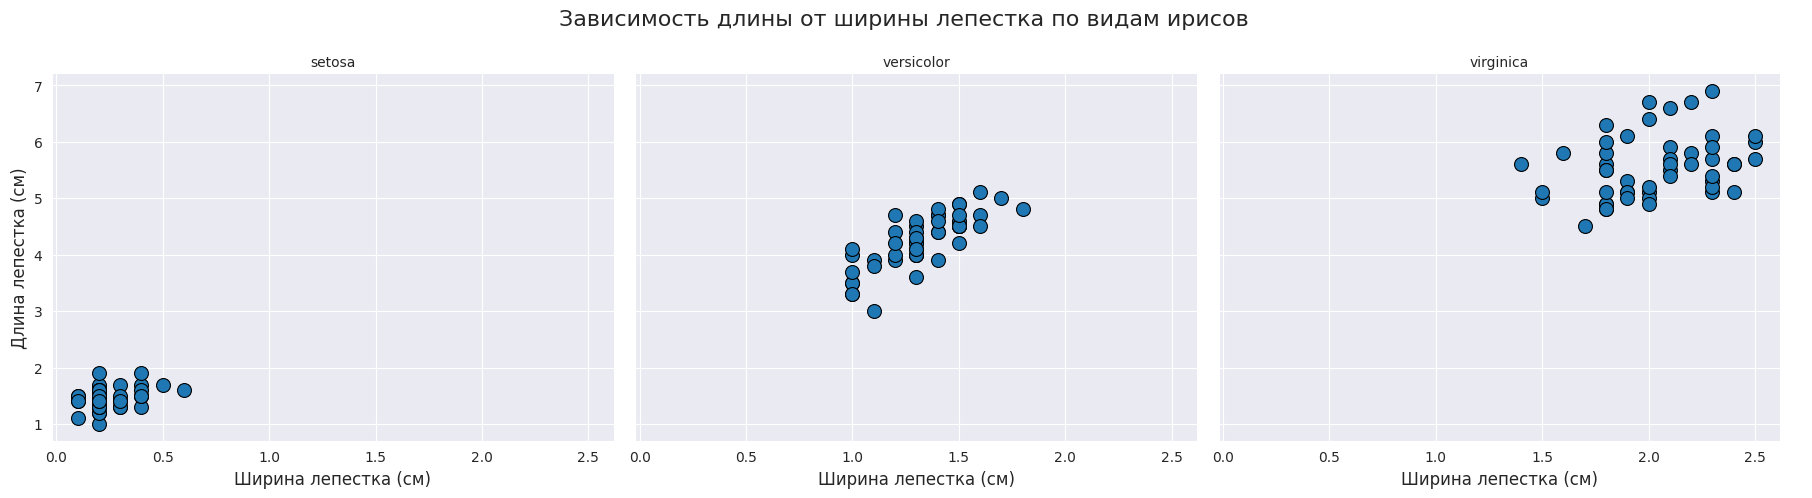

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

g = sns.FacetGrid(iris, col="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "petal_width", "petal_length", s=100, edgecolor='black')

g.set_axis_labels("Ширина лепестка (см)", "Длина лепестка (см)", fontsize=12)
g.set_titles("{col_name}", fontsize=14)
g.add_legend()

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Зависимость длины от ширины лепестка по видам ирисов", fontsize=16)
plt.show()


Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<ul>
  <li>Используя scatterplot, можно заметить, что точки располагаются примерно вдоль одной прямой.</li>
  <li>С помощью jointplot можно увидеть зоны с большей плотностью точек и провести линию корреляции.</li>
  <li>Используя FacetGrid, можно заметить, что для каждого вида ириса характерен определённый диапазон длины и ширины лепестков.</li>
</ul>


## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

<ipython-input-46-7fd46165ab0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


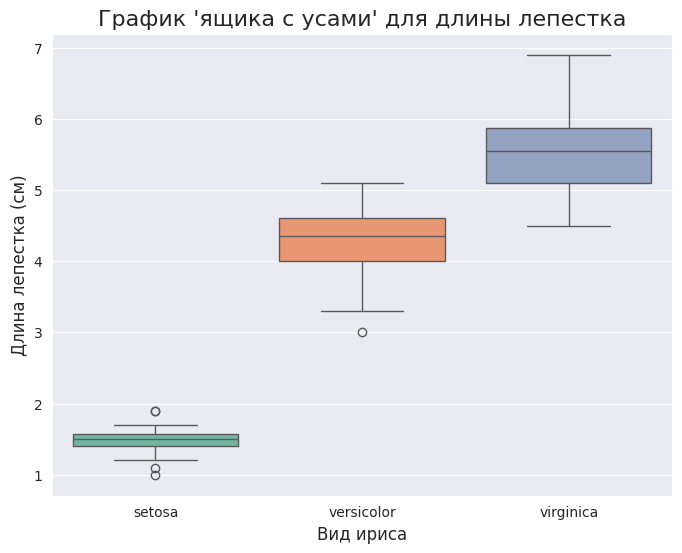

In [ ]:
iris = sns.load_dataset("iris")

plt.figure(figsize=(8, 6))

sns.boxplot(
    data=iris,
    x="species",
    y="petal_length",
    palette="Set2"
)

plt.title("График 'ящика с усами' для длины лепестка", fontsize=16)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=12)
plt.show()


<ipython-input-45-14ec76c7be6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


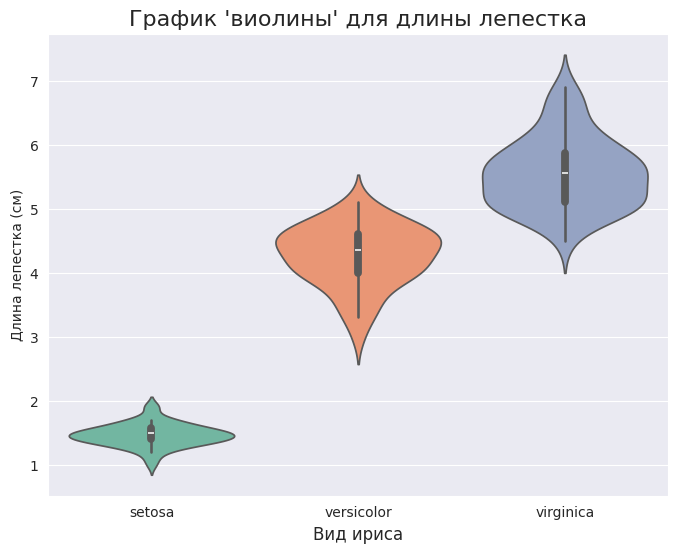

In [ ]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    data=iris,
    x="species",
    y="petal_length",
    palette="Set2"
)

plt.title("График 'виолины' для длины лепестка", fontsize=16)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=10)
plt.show()


Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

## Визуализация данных с использованием `sns.violinplot` и `sns.boxplot`

1. Моему начальству больше нравится использовать `sns.violinplot`.

## Особенности `sns.boxplot`:
- Нижняя граница коробки показывает, что 25% значений меньше этого значения.
- Средняя линия в коробке отображает медиану распределения данных.
- Верхняя граница коробки обозначает значение, ниже которого лежат 75% данных.
- Расстояние между верхней и нижней границами коробки показывает диапазон, в котором сосредоточена основная часть данных.
- «Усы» показывают минимальные и максимальные значения данных.
- Точки, выходящие за пределы усов, указывают на выбросы.

## Особенности `sns.violinplot`:
- Форма виолончели отображает плотность распределения данных.
- Вертикальная линия внутри формы аналогична средней линии в `boxplot`.
- Внешние значения за пределами вертикальной линии указывают на аномалии.

## Вывод:
` sns.violinplot` объединяет в себе особенности `boxplot` и добавляет информацию о плотности распределения данных. На мой взгляд, этот метод предоставляет более полное представление о данных, чем `boxplot`.


## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

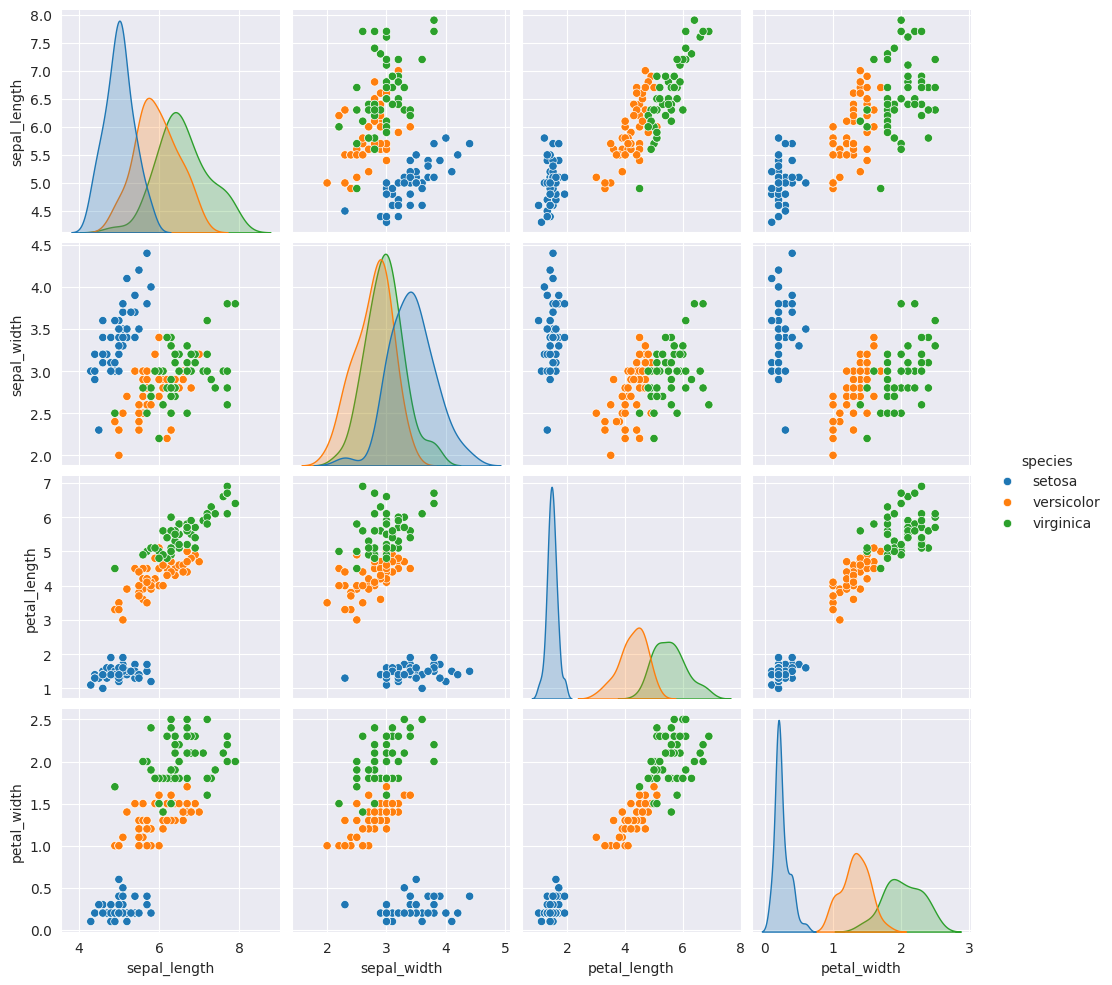

In [ ]:
sns.pairplot(
    data= iris,
    hue= "species",
)

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

По графику можно понять какие признаки наиболее важны для анализа: например, petal важен, т.к. из графиков можно много чего сказать, а по sepal непонятно, какие выводы можно сделать, т.к. точки перекрывают друг друга.


Какие графики находятся на диагонали этой таблицы?

На диагонале находятся гистограммы, которые необходимы для анализа распределения данных

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

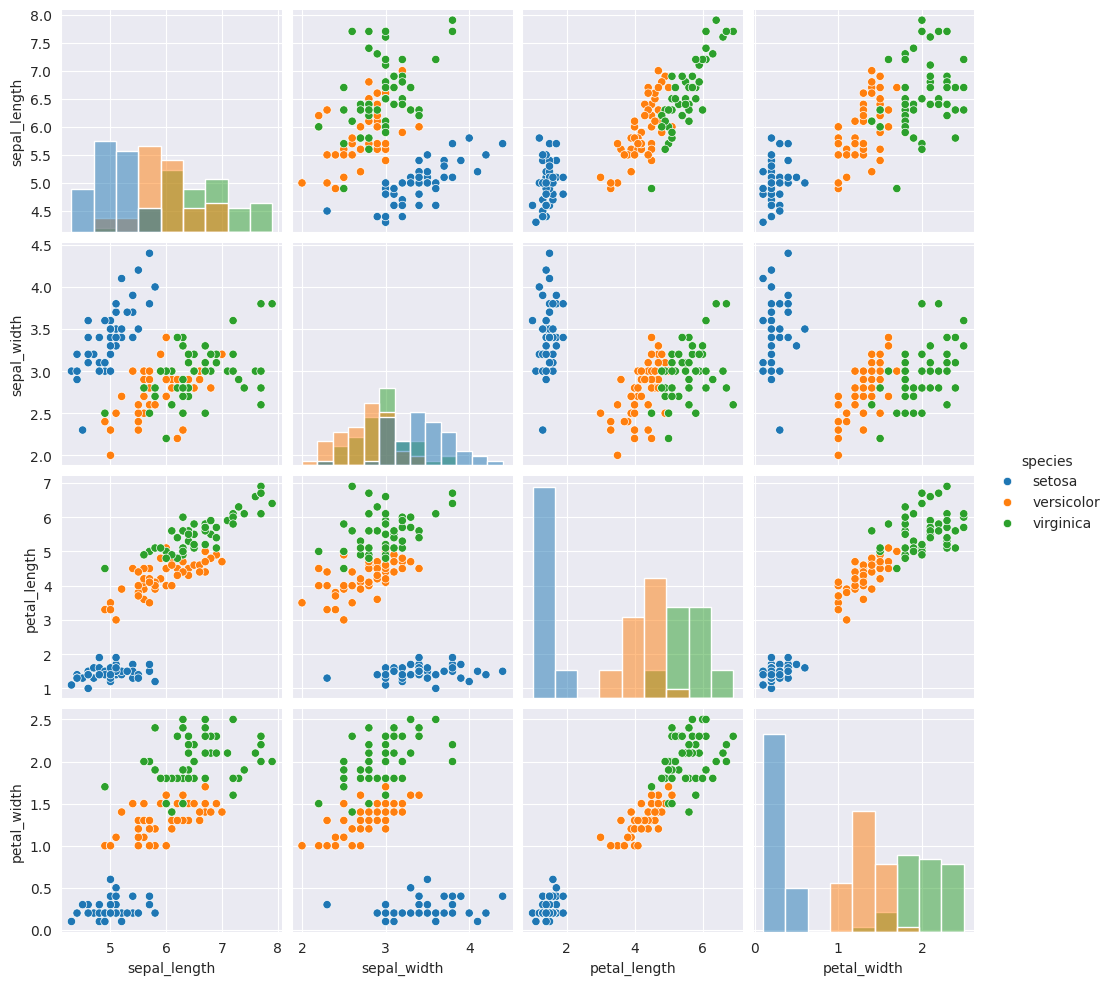

In [ ]:
sns.pairplot(
    data= iris,
    hue= "species",
    diag_kind= "hist"

)

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

1. **"kde"** — это сглаженная гистограмма, которая используется для анализа формы распределения данных (например, симметрии, выбросов и т.д.). Этот метод применяется для непрерывных данных.
2. **"hist"** — гистограмма в виде прямоугольников, которая отображает частоты значений. Она используется для категориальных или дискретных данных.

В данном контексте целесообразно использовать **"hist"**, поскольку данные разбиты по категориям. Тем не менее, также можно применить **"kde"**, чтобы получить представление о распределении данных.
